In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
import time

In [85]:
import numpy as np
import pandas as pd

In [86]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [90]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

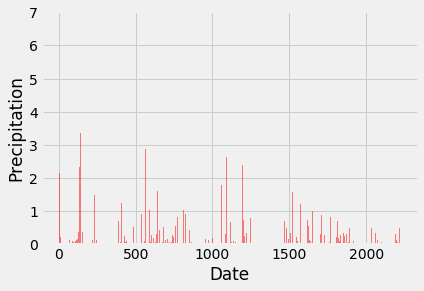

<Figure size 432x288 with 0 Axes>

In [131]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = []
measure = session.query(measurement)
for m in measure:
    lstdate = datetime.strptime(m.date,'%Y-%m-%d') 

# Calculate the date 1 year ago from the last data point in the database
lstyr = lstdate - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
lstyrquery = session.query(measurement).\
    filter(measurement.date >= lstyr)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpdf = pd.read_sql(lstyrquery.statement, lstyrquery.session.bind).fillna(0)

# Sort the dataframe by date
prcpdf = prcpdf.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(len(prcpdf["prcp"]))
#tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, prcpdf['prcp'], color='r', alpha=0.5, align="edge")
plt.xlabel("Date")
plt.ylabel("Precipitation")
#plt.xticks(tick_locations, prcpdf['date'], rotation="vertical")
plt.show()
plt.savefig("prcp_rain.png")

![precipitation](Images/precipitation.png)

In [82]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcpdf["prcp"].describe()

count    2223.000000
mean        0.159951
std         0.441220
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [108]:
# Design a query to show how many stations are available in this dataset?
stations = len(pd.DataFrame(session.query(measurement.station)).drop_duplicates())
stations

9

In [144]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

countstat = pd.DataFrame(session.query(measurement.station))
countstat['number of entries'] = pd.DataFrame(session.query(measurement.tobs))
countstat = countstat.dropna()
countstat.groupby('station').count().sort_values(by=['number of entries'], ascending=False)


,number of entries
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

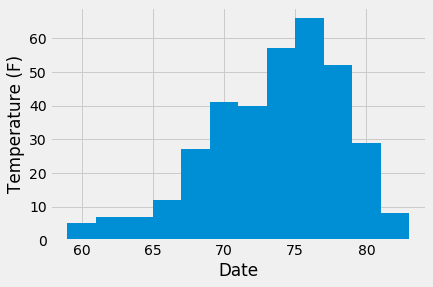

In [153]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobdat = session.query(measurement).\
    filter(measurement.date >= lstyr).\
    filter(measurement.station == 'USC00519281')

tobdf = pd.read_sql(tobdat.statement, tobdat.session.bind)

plt.hist(tobdf['tobs'],bins=12)
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()